### (40%) Perform basic data engineering

(1) fetch to your local file system every 5th year of data starting with 1975 to 2020. That is you will automate downloading
the .zip files at the static FTP site and store it locally for 1975, 1980, 1985, … 2015 and 2020.

(2) Once you have fetched the .zip files locally, you will then unzip them automatically to a folder corresponding to their
year. Thus you will have 10 folders "./1975","./1980", … which will contain the contents of their correspoding .zip
file from the NHTSA.

In [1]:
from fars_cleaner import FARSFetcher
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

fetcher = FARSFetcher()
cache_path = Path('NHTSA/')
fetcher = FARSFetcher(cache_path=cache_path)
years = ['1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']
for i in years:
    fetcher.fetch_single(i)
    
#reference: https://pypi.org/project/fars-cleaner/

100%|#####################################| 4.68M/4.68M [00:00<00:00, 4.69GB/s]
Unzipping contents of 'C:\Users\chait\Desktop\NHTSA\NHTSA\1975.zip' to 'C:\Users\chait\Desktop\NHTSA\NHTSA\./1975.unzip'
100%|#####################################| 5.30M/5.30M [00:00<00:00, 2.64GB/s]
Unzipping contents of 'C:\Users\chait\Desktop\NHTSA\NHTSA\1980.zip' to 'C:\Users\chait\Desktop\NHTSA\NHTSA\./1980.unzip'
100%|#####################################| 6.52M/6.52M [00:00<00:00, 6.51GB/s]
Unzipping contents of 'C:\Users\chait\Desktop\NHTSA\NHTSA\1985.zip' to 'C:\Users\chait\Desktop\NHTSA\NHTSA\./1985.unzip'
100%|#####################################| 7.00M/7.00M [00:00<00:00, 6.99GB/s]
Unzipping contents of 'C:\Users\chait\Desktop\NHTSA\NHTSA\1990.zip' to 'C:\Users\chait\Desktop\NHTSA\NHTSA\./1990.unzip'
100%|#####################################| 7.23M/7.23M [00:00<00:00, 7.22GB/s]
Unzipping contents of 'C:\Users\chait\Desktop\NHTSA\NHTSA\1995.zip' to 'C:\Users\chait\Desktop\NHTSA\NHTSA\./1995.un

(3) You will notice each of these folders contain many .csv files. You will create a folder at the same level as your notebook
called accident_all_years and you will copy (not move), each of the yearly files (i.e. "1975/accident.csv") to the
folder "accident_all_years/1975_accident.csv". The new folder will contain just the accident.csv files for
all years downloaded.

In [2]:
import os, shutil

newpath = r'accident_all_years' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

for i in years:
    src_path = r'NHTSA/' +i+ '.unzip/ACCIDENT.csv'
    dst_path = r'accident_all_years'
    shutil.copy(src_path, dst_path)
    old_name = r'accident_all_years/ACCIDENT.csv'
    new_name = r'accident_all_years/'+i+'_accident.csv'
    os.rename(old_name, new_name)

### (30%) Manipulate and analyze the data from NHTSA

#### § Task: (Descriptive Statistics / Exploratory Data Analysis)

(a) What is the overall number fatal accidents for the entire dataset period from 1975-2020? (Note: the denomenator is the
total number of accidents)

In [30]:
import pandas as pd

total_accidents = []
for i in years:
    df = pd.read_csv('accident_all_years/'+i+'_accident.csv')
    mask = df.loc[(df['FATALS'] != 0)]
    s = len(mask)
    total_accidents.append(s)
    
print('Overall number fatal accidents for the entire dataset period from 1975-2020:', sum(total_accidents))

Overall number fatal accidents for the entire dataset period from 1975-2020: 376086


In [31]:
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER', 'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME',
       'NOT_HOUR', 'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOUR',
       'ARR_HOURNAME', 'ARR_M

(b) How many people died over that period? How many total people were involved (fatal and non-fatal)?

In [7]:
fatals = []
for i in years:
    df = pd.read_csv('accident_all_years/'+i+'_accident.csv')
    s = df.FATALS.sum()
    fatals.append(s)
    
print('Overall number people died over that period from 1975-2020:', sum(fatals))

Overall number people died over that period from 1975-2020: 418619


In [8]:
persons = []
for i in years:
    df = pd.read_csv('accident_all_years/'+i+'_accident.csv')
    s = df.PERSONS.sum()
    persons.append(s)
x =  sum(persons) + sum(fatals)
print(' How many total people were involved (fatal and non-fatal)?:', x)

 How many total people were involved (fatal and non-fatal)?: 1374315


(c) What proportion of accidents occurred between 9pm and 4am (overnight)?

In [18]:
acc = []
accd = []
for i in years:
    df = pd.read_csv('accident_all_years/'+i+'_accident.csv')
    mask = df.loc[(df['HOUR'] >= 21)]
    mask2 = df.loc[(df['HOUR'] <= 4)]
    final_mask = pd.concat([mask, mask2])
    a = len(final_mask)
    acc.append(a)
    b = len(df)
    accd.append(b)
propotion = (sum(acc)/sum(accd))*100
print('number of accidents occurred between 9pm and 4am (overnight):', sum(acc))
print('number of accidents occurred:', sum(accd))
print('proportion of accidents occurred between 9pm and 4am (overnight):', propotion, '%')

number of accidents occurred between 9pm and 4am (overnight): 134869
number of accidents occurred: 376096
proportion of accidents occurred between 9pm and 4am (overnight): 35.86025908278737 %


(d) What proportion of accidents occurred when the weather was snowy?

In [56]:
weather = []
accd = []
for i in years:
    df = pd.read_csv('accident_all_years/'+i+'_accident.csv')
    mask = df.loc[(df['WEATHER'] == 4)]
    a = len(mask)
    weather.append(a)
    b = len(df)
    accd.append(b)
propotion = (sum(weather)/sum(accd))*100
print('number of accidents occurred when the weather was snowy:', sum(weather))
print('number of accidents occurred:', sum(accd))
print('proportion of number of accidents occurred when the weather was snowy:', propotion, '%')

number of accidents occurred when the weather was snowy: 6149
number of accidents occurred: 376096
proportion of number of accidents occurred when the weather was snowy: 1.6349549051306052 %


(e) Build a line graph that shows the total fatalities by year (using the dataset with just every 5 years of data).

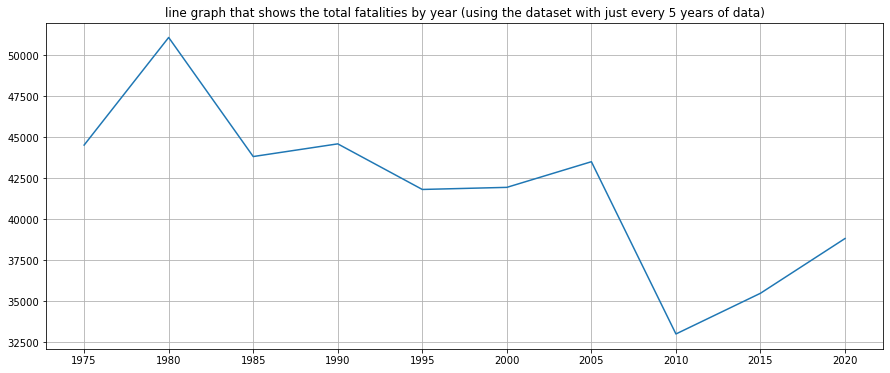

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,6))
plt.plot(years, fatals)
plt.title('line graph that shows the total fatalities by year (using the dataset with just every 5 years of data)')
plt.grid()
plt.show()

(f) Make a general statement about what you observe in the line graph.

The highest number of fatals occur in the year 1980 while the least number of fatals occur in the year 2010

#### § Task: (Descriptive Statistics / Exploratory Data Analysis)

(a) From 1975-2020, what was the average (mean) rate of fatal accidents which involved an intoxicated driver? This would
be over all states.

In [58]:
pd.pandas.set_option('display.max_columns', None)
df.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,COUNTYNAME,CITY,CITYNAME,DAY,DAYNAME,MONTH,MONTHNAME,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,HOURNAME,MINUTE,MINUTENAME,NHS,NHSNAME,ROUTE,ROUTENAME,TWAY_ID,TWAY_ID2,RUR_URB,RUR_URBNAME,FUNC_SYS,FUNC_SYSNAME,RD_OWNER,RD_OWNERNAME,MILEPT,MILEPTNAME,LATITUDE,LATITUDENAME,LONGITUD,LONGITUDNAME,SP_JUR,SP_JURNAME,HARM_EV,HARM_EVNAME,MAN_COLL,MAN_COLLNAME,RELJCT1,RELJCT1NAME,RELJCT2,RELJCT2NAME,TYP_INT,TYP_INTNAME,WRK_ZONE,WRK_ZONENAME,REL_ROAD,REL_ROADNAME,LGT_COND,LGT_CONDNAME,WEATHER,WEATHERNAME,SCH_BUS,SCH_BUSNAME,RAIL,RAILNAME,NOT_HOUR,NOT_HOURNAME,NOT_MIN,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,4,4,0,51,ELMORE (51),0,NOT APPLICABLE,1,1,1,January,2020,4,Wednesday,2,2:00am-2:59am,58,58,0,This section IS NOT on the NHS,4,County Road,cr-4,NaN,1,Rural,5,Major Collector,2,County Highway Agency,0,None,32.433133,32.43313333,-86.094850,-86.09485,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,None,4,On Roadside,2,Dark - Not Lighted,1,Clear,0,No,0000000,Not Applicable,99,Unknown,99,Unknown,3,3:00am-3:59am,10,10,99,Unknown,99,Unknown EMS Hospital Arrival Time,3,1
1,1,Alabama,10002,4,4,0,0,6,6,0,73,JEFFERSON (73),350,BIRMINGHAM,2,2,1,January,2020,5,Thursday,17,5:00pm-5:59pm,18,18,0,This section IS NOT on the NHS,6,Local Street - Municipality,martin luther king jr dr,NaN,2,Urban,4,Minor Arterial,4,City or Municipal Highway Agency,0,None,33.484658,33.48465833,-86.839544,-86.83954444,0,No Special Jurisdiction,12,Motor Vehicle In-Transport,6,Angle,0,No,1,Non-Junction,1,Not an Intersection,0,None,1,On Roadway,3,Dark - Lighted,2,Rain,0,No,0000000,Not Applicable,17,5:00pm-5:59pm,18,18,17,5:00pm-5:59pm,26,26,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2,1,Alabama,10003,2,2,0,0,2,2,0,117,SHELBY (117),0,NOT APPLICABLE,2,2,1,January,2020,5,Thursday,14,2:00pm-2:59pm,55,55,0,This section IS NOT on the NHS,3,State Highway,sr-76,us-280,1,Rural,4,Minor Arterial,1,State Highway Agency,49,49,33.299942,33.29994167,-86.369642,-86.36964167,0,No Special Jurisdiction,34,Ditch,0,The First Harmful Event was Not a Collision wi...,0,No,3,Intersection-Related,3,T-Intersection,0,None,4,On Roadside,1,Daylight,2,Rain,0,No,0000000,Not Applicable,14,2:00pm-2:59pm,58,58,15,3:00pm-3:59pm,15,15,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3,1,Alabama,10004,1,1,0,0,5,5,0,15,CALHOUN (15),0,NOT APPLICABLE,3,3,1,January,2020,6,Friday,15,3:00pm-3:59pm,20,20,0,This section IS NOT on the NHS,4,County Road,CR-ALEXANDRIA WELLINGTON RD,NaN,1,Rural,7,Local,2,County Highway Agency,0,None,33.795072,33.79507222,-85.883486,-85.88348611,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,None,4,On Roadside,1,Daylight,10,Cloudy,0,No,0000000,Not Applicable,99,Unknown,99,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,37,COOSA (37),0,NOT APPLICABLE,4,4,1,January,2020,7,Saturday,0,0:00am-0:59am,45,45,0,This section IS NOT on the NHS,4,County Road,CR-63,NaN,1,Rural,5,Major Collector,2,County Highway Agency,0,None,32.848414,32.84841389,-86.083547,-86.08354722,0,No Special Jurisdiction,42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,No,1,Non-Junction,1,Not an Intersection,0,None,4,On Roadside,2,Dark - Not Lighted,2,Rain,0,No,0000000,Not Applicable,0,0:00am-0:59am,45,45,0,0:00am-0:59am,55,55,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [53]:
import numpy as np
intox = []
total_accidents = []

for i in years:
    df = pd.read_csv('accident_all_years/'+i+'_accident.csv')
    mask = df.loc[(df['DRUNK_DR'] == 1)]
    a = mask.FATALS.sum()
    intox.append(a)
    mask2 = df.loc[(df['FATALS'] != 0)]
    s = len(mask2)
    total_accidents.append(s)
propotion = (np.mean(intox)/np.mean(total_accidents))*100
print('average (mean) sum of fatal accidents which involved an intoxicated driver:', np.mean(intox))
print('average (mean) fatal accidents for the entire dataset period from 1975-2020:', np.mean(total_accidents))
print('average (mean) rate of fatal accidents which involved an intoxicated driver:', propotion, '%')

average (mean) sum of fatal accidents which involved an intoxicated driver: 13060.7
average (mean) fatal accidents for the entire dataset period from 1975-2020: 37608.6
average (mean) rate of fatal accidents which involved an intoxicated driver: 34.72796115782029 %


b) In 1975 which 5 states had the highest rate of fatal accidents involving an intoxicated driver? Which 5 had the least?
Please list the states and the rates in a table in the notebook.

In [88]:
df = pd.read_csv('accident_all_years/1975_accident.csv')

In [89]:
df.head()

,STATE,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,LAND_USE,CL_TWAY,ROAD_FNC,TA_1_CL,SP_JUR,HARM_EV,MAN_COLL,REL_JUNC,REL_ROAD,ROAD_FLO,NO_LANES,SP_LIMIT,ALIGNMNT,PROFILE,PAVE_TYP,SUR_COND,TRA_CONT,LGT_COND,WEATHER,HIT_RUN,C_M_ZONE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,SCH_BUS,CF1,CF2,CF3,FATALS,DAY_WEEK,DRUNK_DR,ST_CASE,CITY,RAIL
0,1,95,1,4,75,22,24,3,3,NaN,1,3,NaN,NaN,0,12,2,1,1,3,4,55,1,1,2,2,0,2,1,0,NaN,99,99,22,40,NaN,0,0,0,1,7,0,10001,400,*******
1,1,95,1,2,75,4,30,1,2,NaN,2,4,NaN,NaN,0,18,0,1,5,4,2,50,2,1,2,1,0,2,1,0,NaN,99,99,4,50,NaN,0,0,0,1,5,0,10002,110,*******
2,1,35,1,1,75,4,0,1,1,NaN,2,6,NaN,NaN,0,1,0,1,4,4,2,55,1,2,2,1,0,2,1,0,NaN,99,99,5,40,NaN,0,0,0,1,4,0,10003,0,*******
3,1,77,1,2,75,14,50,1,3,NaN,2,6,NaN,NaN,0,27,0,1,4,4,2,55,2,1,2,1,0,1,1,0,NaN,99,99,17,20,NaN,0,0,0,1,5,0,10004,0,*******
4,1,97,1,5,75,20,0,1,1,NaN,1,7,NaN,NaN,0,28,0,1,2,4,2,35,1,1,1,1,0,2,1,0,NaN,99,99,20,10,NaN,0,0,0,1,1,0,10005,2100,*******


In [90]:
mask = df.loc[(df['DRUNK_DR'] == 1)]
mask2 = df.loc[(df['FATALS'] != 0)]
mask2.head()

,STATE,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,LAND_USE,CL_TWAY,ROAD_FNC,TA_1_CL,SP_JUR,HARM_EV,MAN_COLL,REL_JUNC,REL_ROAD,ROAD_FLO,NO_LANES,SP_LIMIT,ALIGNMNT,PROFILE,PAVE_TYP,SUR_COND,TRA_CONT,LGT_COND,WEATHER,HIT_RUN,C_M_ZONE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,SCH_BUS,CF1,CF2,CF3,FATALS,DAY_WEEK,DRUNK_DR,ST_CASE,CITY,RAIL
0,1,95,1,4,75,22,24,3,3,NaN,1,3,NaN,NaN,0,12,2,1,1,3,4,55,1,1,2,2,0,2,1,0,NaN,99,99,22,40,NaN,0,0,0,1,7,0,10001,400,*******
1,1,95,1,2,75,4,30,1,2,NaN,2,4,NaN,NaN,0,18,0,1,5,4,2,50,2,1,2,1,0,2,1,0,NaN,99,99,4,50,NaN,0,0,0,1,5,0,10002,110,*******
2,1,35,1,1,75,4,0,1,1,NaN,2,6,NaN,NaN,0,1,0,1,4,4,2,55,1,2,2,1,0,2,1,0,NaN,99,99,5,40,NaN,0,0,0,1,4,0,10003,0,*******
3,1,77,1,2,75,14,50,1,3,NaN,2,6,NaN,NaN,0,27,0,1,4,4,2,55,2,1,2,1,0,1,1,0,NaN,99,99,17,20,NaN,0,0,0,1,5,0,10004,0,*******
4,1,97,1,5,75,20,0,1,1,NaN,1,7,NaN,NaN,0,28,0,1,2,4,2,35,1,1,1,1,0,2,1,0,NaN,99,99,20,10,NaN,0,0,0,1,1,0,10005,2100,*******


In [91]:
print('5 states had the highest rate of fatal accidents involving an intoxicated driver:')
masx = mask2[["STATE", "FATALS"]]
masx = masx.groupby(['STATE']).sum()
masx = masx.sort_values(by=['FATALS'], ascending=False)
masx.head()

5 states had the highest rate of fatal accidents involving an intoxicated driver:


,FATALS
STATE,
6,4092
48,3372
36,2366
42,2078
17,2041


In [92]:
print('5 states had the least rate of fatal accidents involving an intoxicated driver:')
masx.tail()

5 states had the least rate of fatal accidents involving an intoxicated driver:


,FATALS
STATE,
50,143
10,122
2,112
44,110
11,70


(c) By 1990, how much had the top and bottom 5 changed (if at all)?

In [93]:
df = pd.read_csv('accident_all_years/1990_accident.csv')

In [94]:
mask = df.loc[(df['DRUNK_DR'] == 1)]
mask2 = df.loc[(df['FATALS'] != 0)]
mask2.head()

,STATE,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,FED_AID,ROAD_FNC,ROUTE,SP_JUR,HARM_EV,MAN_COLL,REL_JUNC,REL_ROAD,TRAF_FLO,NO_LANES,SP_LIMIT,ALIGNMNT,PROFILE,PAVE_TYP,SUR_COND,TRA_CONT,T_CONT_F,HIT_RUN,LGT_COND,WEATHER,C_M_ZONE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,SCH_BUS,CF1,CF2,CF3,FATALS,DAY_WEEK,DRUNK_DR,ST_CASE,MILEPT,CITY,TWAY_ID,RAIL
0,1,117,1,7,90,6,45,1,1,1,1,1,0,42,0,1,3,2,2,65,1,2,2,2,0,0,0,1,2,0,8,11,8,12,0,0,0,0,0,0,1,1,1,10001,2350,0,I65,0000000
1,1,125,1,1,90,1,38,1,2,5,6,4,0,30,0,1,4,1,4,40,1,3,2,1,0,0,0,2,1,0,2,19,2,25,2,31,0,0,0,0,1,2,1,10002,0,0,2118,0000000
2,1,97,1,3,90,17,30,2,4,3,13,2,0,12,4,8,1,2,2,55,1,1,2,1,20,3,0,2,1,0,99,99,18,0,99,99,0,0,0,0,1,4,0,10003,196,0,SR13,0000000
3,1,55,1,6,90,5,18,2,3,2,13,2,0,12,4,2,1,2,2,50,1,1,2,2,3,3,0,3,2,0,5,19,5,21,99,99,0,0,0,0,1,7,1,10004,99999,1280,SR1,0000000
4,1,15,1,8,90,7,50,3,3,5,16,4,0,12,2,1,1,1,2,35,2,2,2,1,0,0,0,1,1,0,7,56,8,3,0,0,0,0,0,0,1,2,1,10005,0,100,5881,0000000


In [95]:
print('5 states had the highest rate of fatal accidents involving an intoxicated driver:')
masx = mask2[["STATE", "FATALS"]]
masx = masx.groupby(['STATE']).sum()
masx = masx.sort_values(by=['FATALS'], ascending=False)
masx.head()

5 states had the highest rate of fatal accidents involving an intoxicated driver:


,FATALS
STATE,
6,5192
48,3250
12,2891
36,2217
42,1646


In [96]:
print('5 states had the least rate of fatal accidents involving an intoxicated driver:')
masx.tail()

5 states had the least rate of fatal accidents involving an intoxicated driver:


,FATALS
STATE,
38,112
2,98
50,90
44,84
11,48


In comparision to the fatals in the year 1975, 1990 has only one change in both top 5 and bottom 5 fatals.

(d) What was the average (mean) rate in 2020?

In [97]:
df = pd.read_csv('accident_all_years/2020_accident.csv')
print('average (mean) rate in 2020:', df['FATALS'].mean())

average (mean) rate in 2020: 1.0855001957166024


(e) Plot a graph with the top and bottom five states, showing just the rate over time (from 1975-2020). You can plot these in
two graphs (top 5 and bottom 5 do not have to be in the same graph)

In [104]:
df1 = pd.read_csv('accident_all_years/1975_accident.csv')
df2 = pd.read_csv('accident_all_years/1980_accident.csv')
df3 = pd.read_csv('accident_all_years/1985_accident.csv')
df4 = pd.read_csv('accident_all_years/1990_accident.csv')
df5 = pd.read_csv('accident_all_years/1995_accident.csv')
df6 = pd.read_csv('accident_all_years/2000_accident.csv')
df7 = pd.read_csv('accident_all_years/2005_accident.csv')
df8 = pd.read_csv('accident_all_years/2010_accident.csv')
df9 = pd.read_csv('accident_all_years/2015_accident.csv')
df10 = pd.read_csv('accident_all_years/2020_accident.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])
df.head()

,STATE,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,LAND_USE,CL_TWAY,ROAD_FNC,TA_1_CL,SP_JUR,HARM_EV,MAN_COLL,REL_JUNC,REL_ROAD,ROAD_FLO,NO_LANES,SP_LIMIT,ALIGNMNT,PROFILE,PAVE_TYP,SUR_COND,TRA_CONT,LGT_COND,WEATHER,HIT_RUN,C_M_ZONE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,SCH_BUS,CF1,CF2,CF3,FATALS,DAY_WEEK,DRUNK_DR,ST_CASE,CITY,RAIL,FED_AID,TWAY_FLO,T_CONT_F,MILEPT,TWAY_ID,ROUTE,TRAF_FLO,HOSP_HR,HOSP_MN,NHS,PEDS,LATITUDE,LONGITUD,VE_TOTAL,TWAY_ID2,latitude,longitud,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,WEATHER1,WEATHER2,STATENAME,PVH_INVL,PERMVIT,PERNOTMVIT,DAYNAME,MONTHNAME,DAY_WEEKNAME,HOURNAME,MINUTENAME,NHSNAME,ROUTENAME,RUR_URB,RUR_URBNAME,FUNC_SYS,FUNC_SYSNAME,RD_OWNER,RD_OWNERNAME,MILEPTNAME,LATITUDENAME,LONGITUDNAME,SP_JURNAME,HARM_EVNAME,MAN_COLLNAME,RELJCT1NAME,RELJCT2NAME,TYP_INTNAME,WRK_ZONENAME,REL_ROADNAME,LGT_CONDNAME,WEATHER1NAME,WEATHER2NAME,WEATHERNAME,SCH_BUSNAME,RAILNAME,NOT_HOURNAME,NOT_MINNAME,ARR_HOURNAME,ARR_MINNAME,HOSP_HRNAME,HOSP_MNNAME,CF1NAME,CF2NAME,CF3NAME,COUNTYNAME,CITYNAME
0,1,95,1,4,75,22,24,3,3,NaN,1.0,3.0,NaN,NaN,0,12,2,1.0,1,3.0,4.0,55.0,1.0,1.0,2.0,2.0,0.0,2,1,0.0,NaN,99,99,22,40,NaN,0.0,0.0,0.0,1,7,0,10001,400,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,95,1,2,75,4,30,1,2,NaN,2.0,4.0,NaN,NaN,0,18,0,1.0,5,4.0,2.0,50.0,2.0,1.0,2.0,1.0,0.0,2,1,0.0,NaN,99,99,4,50,NaN,0.0,0.0,0.0,1,5,0,10002,110,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,35,1,1,75,4,0,1,1,NaN,2.0,6.0,NaN,NaN,0,1,0,1.0,4,4.0,2.0,55.0,1.0,2.0,2.0,1.0,0.0,2,1,0.0,NaN,99,99,5,40,NaN,0.0,0.0,0.0,1,4,0,10003,0,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,77,1,2,75,14,50,1,3,NaN,2.0,6.0,NaN,NaN,0,27,0,1.0,4,4.0,2.0,55.0,2.0,1.0,2.0,1.0,0.0,1,1,0.0,NaN,99,99,17,20,NaN,0.0,0.0,0.0,1,5,0,10004,0,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,97,1,5,75,20,0,1,1,NaN,1.0,7.0,NaN,NaN,0,28,0,1.0,2,4.0,2.0,35.0,1.0,1.0,1.0,1.0,0.0,2,1,0.0,NaN,99,99,20,10,NaN,0.0,0.0,0.0,1,1,0,10005,2100,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.shape

(376096, 113)

In [107]:
mask = df.loc[(df['FATALS'] != 0)]
mask.shape

(376086, 113)

In [108]:
masx = mask[["STATE", "FATALS"]]
masx = masx.groupby(['STATE']).sum()
masx = masx.sort_values(by=['FATALS'], ascending=False)
masx.head()

,FATALS
STATE,
6,41972
48,35643
12,28581
36,17155
42,15853


In [113]:
masx.tail()

,FATALS
STATE,
38,1139
50,930
2,876
44,847
11,456


#### § Task: (Distance Metrics / Exploratory Data Analysis)

(a) You will create a subset of the data over all years.
• include 5000 random rows of data
• restrict data only to the following columns:
'STATE',
'MONTH',
'DAY',
'YEAR',
'HOUR',
'PERSONS',
'MAN_COLL',
'LGT_COND',
'WEATHER',
'SCH_BUS',
'FATALS',
'DAY_WEEK',
'DRUNK_DR',
• you may need to eliminate rows with NaN data to simplify the analysis

In [140]:
df1 = pd.read_csv('accident_all_years/1975_accident.csv')
df2 = pd.read_csv('accident_all_years/1980_accident.csv')
df3 = pd.read_csv('accident_all_years/1985_accident.csv')
df4 = pd.read_csv('accident_all_years/1990_accident.csv')
df5 = pd.read_csv('accident_all_years/1995_accident.csv')
df6 = pd.read_csv('accident_all_years/2000_accident.csv')
df7 = pd.read_csv('accident_all_years/2005_accident.csv')
df8 = pd.read_csv('accident_all_years/2010_accident.csv')
df9 = pd.read_csv('accident_all_years/2015_accident.csv')
df10 = pd.read_csv('accident_all_years/2020_accident.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])
df.head()

,STATE,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,LAND_USE,CL_TWAY,ROAD_FNC,TA_1_CL,SP_JUR,HARM_EV,MAN_COLL,REL_JUNC,REL_ROAD,ROAD_FLO,NO_LANES,SP_LIMIT,ALIGNMNT,PROFILE,PAVE_TYP,SUR_COND,TRA_CONT,LGT_COND,WEATHER,HIT_RUN,C_M_ZONE,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,SCH_BUS,CF1,CF2,CF3,FATALS,DAY_WEEK,DRUNK_DR,ST_CASE,CITY,RAIL,FED_AID,TWAY_FLO,T_CONT_F,MILEPT,TWAY_ID,ROUTE,TRAF_FLO,HOSP_HR,HOSP_MN,NHS,PEDS,LATITUDE,LONGITUD,VE_TOTAL,TWAY_ID2,latitude,longitud,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,WEATHER1,WEATHER2,STATENAME,PVH_INVL,PERMVIT,PERNOTMVIT,DAYNAME,MONTHNAME,DAY_WEEKNAME,HOURNAME,MINUTENAME,NHSNAME,ROUTENAME,RUR_URB,RUR_URBNAME,FUNC_SYS,FUNC_SYSNAME,RD_OWNER,RD_OWNERNAME,MILEPTNAME,LATITUDENAME,LONGITUDNAME,SP_JURNAME,HARM_EVNAME,MAN_COLLNAME,RELJCT1NAME,RELJCT2NAME,TYP_INTNAME,WRK_ZONENAME,REL_ROADNAME,LGT_CONDNAME,WEATHER1NAME,WEATHER2NAME,WEATHERNAME,SCH_BUSNAME,RAILNAME,NOT_HOURNAME,NOT_MINNAME,ARR_HOURNAME,ARR_MINNAME,HOSP_HRNAME,HOSP_MNNAME,CF1NAME,CF2NAME,CF3NAME,COUNTYNAME,CITYNAME
0,1,95,1,4,75,22,24,3,3,NaN,1.0,3.0,NaN,NaN,0,12,2,1.0,1,3.0,4.0,55.0,1.0,1.0,2.0,2.0,0.0,2,1,0.0,NaN,99,99,22,40,NaN,0.0,0.0,0.0,1,7,0,10001,400,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,95,1,2,75,4,30,1,2,NaN,2.0,4.0,NaN,NaN,0,18,0,1.0,5,4.0,2.0,50.0,2.0,1.0,2.0,1.0,0.0,2,1,0.0,NaN,99,99,4,50,NaN,0.0,0.0,0.0,1,5,0,10002,110,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,35,1,1,75,4,0,1,1,NaN,2.0,6.0,NaN,NaN,0,1,0,1.0,4,4.0,2.0,55.0,1.0,2.0,2.0,1.0,0.0,2,1,0.0,NaN,99,99,5,40,NaN,0.0,0.0,0.0,1,4,0,10003,0,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,77,1,2,75,14,50,1,3,NaN,2.0,6.0,NaN,NaN,0,27,0,1.0,4,4.0,2.0,55.0,2.0,1.0,2.0,1.0,0.0,1,1,0.0,NaN,99,99,17,20,NaN,0.0,0.0,0.0,1,5,0,10004,0,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,97,1,5,75,20,0,1,1,NaN,1.0,7.0,NaN,NaN,0,28,0,1.0,2,4.0,2.0,35.0,1.0,1.0,1.0,1.0,0.0,2,1,0.0,NaN,99,99,20,10,NaN,0.0,0.0,0.0,1,1,0,10005,2100,*******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df = df[['STATE', 'MONTH', 'DAY', 'YEAR', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND',
         'WEATHER', 'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR']]

In [142]:
df.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
0,1,1,4,75,22,3,2,2,1,NaN,1,7,0
1,1,1,2,75,4,2,0,2,1,NaN,1,5,0
2,1,1,1,75,4,1,0,2,1,NaN,1,4,0
3,1,1,2,75,14,3,0,1,1,NaN,1,5,0
4,1,1,5,75,20,1,0,2,1,NaN,1,1,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376096 entries, 0 to 35765
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STATE     376096 non-null  int64  
 1   MONTH     376096 non-null  int64  
 2   DAY       376096 non-null  int64  
 3   YEAR      376096 non-null  int64  
 4   HOUR      376096 non-null  int64  
 5   PERSONS   376096 non-null  int64  
 6   MAN_COLL  376096 non-null  int64  
 7   LGT_COND  376096 non-null  int64  
 8   WEATHER   376096 non-null  int64  
 9   SCH_BUS   336935 non-null  float64
 10  FATALS    376096 non-null  int64  
 11  DAY_WEEK  376096 non-null  int64  
 12  DRUNK_DR  376096 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 40.2 MB


In [144]:
df = df.dropna()

df.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
0,1,1,2,80,8,2,2,1,1,0.0,1,4,0
1,1,1,3,80,12,2,4,1,1,0.0,2,5,0
2,1,1,1,80,21,1,0,2,1,0.0,1,3,1
3,1,1,1,80,17,7,2,2,1,0.0,1,3,0
4,1,1,5,80,2,1,0,2,1,0.0,1,7,1


In [145]:
df = df.sample(5000)

In [146]:
df.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
19155,24,9,5,80,0,3,0,2,1,0.0,1,6,0
26264,41,12,24,2020,9,2,2,1,1,0.0,2,5,0
6519,12,3,8,2015,12,2,2,1,1,0.0,1,1,0
21729,34,8,30,2000,11,6,0,1,1,0.0,1,4,0
7661,11,7,24,85,21,3,1,2,1,0.0,1,4,0


In [147]:
df.shape

(5000, 13)

(b) Scale the data from part (a) such that all values are between 0 and 1.

In [154]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(df)

In [155]:
x = pd.DataFrame(data=x, columns=['STATE', 'MONTH', 'DAY', 'YEAR', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND',
                                    'WEATHER', 'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR'])
x.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
0,0.418182,0.727273,0.133333,0.000000,0.000000,0.047619,0.000000,0.125,0.0,0.0,0.000000,0.833333,0.0
1,0.727273,1.000000,0.766667,1.000000,0.090909,0.023810,0.020202,0.000,0.0,0.0,0.166667,0.666667,0.0
2,0.200000,0.181818,0.233333,0.997423,0.121212,0.023810,0.020202,0.000,0.0,0.0,0.000000,0.000000,0.0
3,0.600000,0.636364,0.966667,0.989691,0.111111,0.119048,0.000000,0.000,0.0,0.0,0.000000,0.500000,0.0
4,0.181818,0.545455,0.766667,0.002577,0.212121,0.047619,0.010101,0.125,0.0,0.0,0.000000,0.500000,0.0


(c) Compute the distance metric of all 5000 values using Euclidean distance and build a distance table.

In [156]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
y = dist.pairwise(x)

In [157]:
y.shape

(5000, 5000)

In [159]:
y = pd.DataFrame(data=y, columns=["{}".format(i) for i in np.arange(0,5000)])
y.head()

0         1         2         3         4         5         6  \
0  0.000000  1.285087  1.440733  1.363612  0.803898  1.267513  0.741566   
1  1.285087  0.000000  1.305768  0.503962  1.259177  1.061327  1.449668   
2  1.440733  1.305768  0.000000  1.078902  1.296643  0.820465  1.151417   
3  1.363612  0.503962  1.078902  0.000000  1.108407  0.823609  1.439100   
4  0.803898  1.259177  1.296643  1.108407  0.000000  1.134119  0.929062   

          7         8         9        10        11        12        13  \
0  1.468856  0.577189  1.185969  1.232765  0.607280  1.336801  0.949459   
1  1.234431  1.358618  1.192226  0.971846  1.148903  1.119871  1.422920   
2  0.399916  1.355569  1.052676  0.793836  1.624435  0.367438  1.459048   
3  0.897217  1.400667  1.176175  1.055218  1.203564  0.894323  1.229661   
4  1.214662  0.709007  1.361682  1.356662  0.675927  1.189356  0.452254   

         14        15        16        17        18        19        20  \
0  1.126952  1.386478  1.243356  1.383889  0.940249  0.786040  0.605959   
1  1.385200  0.682718  1.232575  0.957605  1.093937  1.291623  1.108930   
2  1.389096  1.087422  0.883675  1.315458  1.534739  1.589118  1.590142   
3  1.316253  0.627369  1.088541  0.792937  1.100574  1.233059  1.165517   
4  0.729024  1.129259  1.322172  1.329088  0.566743  0.543916  0.579188   

         21        22        23        24        25        26        27  \
0  1.147646  1.465030  1.027831  0.666036  0.869764  1.741233  1.653672   
1  0.803369  1.338335  1.317165  1.456451  1.161410  1.133929  1.310368   
2  1.120759  1.397414  1.483738  1.136699  1.733507  1.541901  1.229631   
3  0.842760  1.278689  1.118861  1.342081  1.177617  1.051034  1.218255   
4  1.130405  1.395869  0.704248  0.738550  0.867533  1.534901  1.601437   

         28        29        30        31        32        33        34  \
0  0.833789  1.561201  0.978542  0.508810  1.167644  0.604316  0.844259   
1  1.425338  1.107723  1.383365  1.275011  1.030122  1.277159  1.391294   
2  1.175694  1.380706  1.445685  1.373447  0.852437  1.297601  1.053652   
3  1.221166  0.839747  1.223364  1.231658  0.891999  1.183530  1.228647   
4  0.443439  1.367689  0.835302  0.706099  1.209024  0.309129  0.550315   

         35        36        37        38        39        40        41  \
0  1.345378  0.874311  1.401453  1.188326  1.518021  1.267748  1.018860   
1  1.456590  1.347586  0.687040  1.537293  1.213314  1.276980  1.712094   
2  1.436312  1.313911  1.348115  1.236542  0.456338  1.027650  1.098341   
3  1.247692  1.190314  0.658002  1.280827  0.935294  1.135720  1.612633   
4  1.000363  0.735406  1.172155  0.797389  1.201637  1.359395  0.969742   

         42        43        44        45        46        47        48  \
0  1.533033  1.243193  1.367695  1.500633  0.831886  0.962799  1.022736   
1  1.133470  0.748137  0.435506  1.413994  1.433393  1.401262  1.153878   
2  0.579118  1.264237  1.553021  0.911109  1.161053  1.190009  1.859945   
3  0.800911  0.668308  0.642304  1.294558  1.283985  1.299971  1.179172   
4  1.151153  1.132926  1.374552  1.575465  0.715039  0.651407  1.000673   

         49        50        51        52        53        54        55  \
0  1.235206  1.320094  1.291220  1.580404  1.314435  0.912343  1.064535   
1  0.946033  0.765727  0.802587  0.749210  1.127952  1.288978  0.879786   
2  0.794216  1.044876  1.221605  1.245273  0.495880  1.286805  1.003314   
3  0.728937  0.542830  0.654518  0.771844  0.988987  1.272635  1.010513   
4  1.049070  1.234324  1.154874  1.443032  1.186035  0.849411  1.258291   

         56        57        58        59        60        61        62  \
0  1.023518  1.267331  1.079612  1.264880  1.147033  1.300507  1.248026   
1  1.139550  0.896876  0.884265  0.896352  0.952408  0.932787  0.981274   
2  1.462880  0.608430  0.689894  0.979954  0.991450  1.188715  1.098014   
3  1.031789  0.765288  0.897007  0.679262  0.924150  0.775367  1.136944   
4  0.493490  1.189990  1.19

(d) Pick 2 random rows from your original 5000 and find the 20 nearest neighbors of each . Use a single sentence to describe
the two collections of 20. You can pretend these each represent a cluster. You must show full work in your notebook.
You may also want to optionally bring all the original columns back (i.e. they contain years, which might be helpful)


In [160]:
from sklearn.metrics import pairwise_distances

In [166]:
df['s.no'] = np.arange(len(df))

In [167]:
sample = df.sample(2)

In [168]:
sample

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR,s.no
14717,27,8,5,2010,9,2,6,1,1,0.0,1,5,0,3195
5789,6,9,23,2005,99,1,0,1,1,0.0,1,6,0,2921


In [172]:
pairwise_distances(y)

array([[4.86280395e-06, 3.71336699e+01, 4.05887985e+01, ...,
        4.00070063e+01, 3.62141605e+01, 2.05354455e+01],
       [3.71336699e+01, 0.00000000e+00, 2.72203168e+01, ...,
        1.78576536e+01, 1.81322236e+01, 3.89089160e+01],
       [4.05887985e+01, 2.72203168e+01, 3.56832255e-06, ...,
        1.91502444e+01, 2.28034183e+01, 3.68208905e+01],
       ...,
       [4.00070063e+01, 1.78576536e+01, 1.91502444e+01, ...,
        0.00000000e+00, 2.23896509e+01, 3.73085897e+01],
       [3.62141605e+01, 1.81322236e+01, 2.28034183e+01, ...,
        2.23896509e+01, 1.90734863e-06, 3.62512380e+01],
       [2.05354455e+01, 3.89089160e+01, 3.68208905e+01, ...,
        3.73085897e+01, 3.62512380e+01, 3.30362474e-06]])

#### § Task: (PCA / Exploratory Data Analysis)

(a) How many components are necessary to capture 90% of the data in the datast from the prior section. Show the plot of
the cummulative variance using PCA.explained_variance_ratio_

In [175]:
df = df.drop('s.no', axis = 1)

In [176]:
df.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
19155,24,9,5,80,0,3,0,2,1,0.0,1,6,0
26264,41,12,24,2020,9,2,2,1,1,0.0,2,5,0
6519,12,3,8,2015,12,2,2,1,1,0.0,1,1,0
21729,34,8,30,2000,11,6,0,1,1,0.0,1,4,0
7661,11,7,24,85,21,3,1,2,1,0.0,1,4,0


In [177]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
x = scaler.fit_transform(df)
pca = PCA()
x_pca = pca.fit_transform(x)

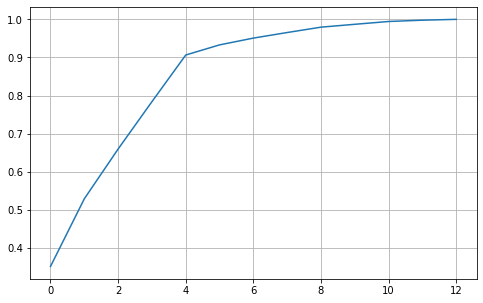

In [178]:
variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize = (8,5))
plt.plot(variance)
plt.grid()
plt.show()

In [179]:
variance

array([0.35110829, 0.52875121, 0.6595022 , 0.78386649, 0.90636824,
       0.93296118, 0.95081082, 0.96542362, 0.97951794, 0.98703495,
       0.99440038, 0.99782311, 1.        ])

5 variables are required to explain 90% of the variance

(b) Please list which feature dominates the first component. To do this, you will need to get the feature with the largest value, which corresponds to the column of the feature you are looking for, requiring a little backtracking.

In [180]:
x_pca = pd.DataFrame(data=x_pca, columns=["PC {}".format(i) for i in np.arange(0,13)])
x_pca.head()

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12
0,0.520150,-0.285583,-0.260575,-0.277528,-0.189394,-0.021863,-0.017318,-0.153797,0.011989,-0.005393,-0.011106,-0.001040,0.014361
1,-0.477934,-0.141439,-0.435265,0.413464,0.074770,-0.142378,-0.013277,-0.028444,-0.008661,0.139894,0.017993,-0.022561,-0.045906
2,-0.482741,0.536172,0.293315,-0.411428,0.003450,-0.122855,0.026030,-0.015348,-0.018368,-0.015874,-0.013299,0.000177,-0.006721
3,-0.463745,0.028179,-0.051312,0.427076,0.275382,-0.141394,0.006166,-0.028595,-0.019055,0.005546,-0.004519,0.013737,0.083690
4,0.528174,0.058246,-0.002845,-0.007414,0.399348,0.004691,0.099421,0.001030,-0.048328,-0.009787,-0.010206,-0.000014,0.012768


In [181]:
pca.components_

array([[-2.51727034e-02, -7.98106378e-05,  1.67308593e-02,
        -9.98842763e-01, -8.80964544e-04,  4.15400722e-03,
        -8.03555412e-03, -6.17843115e-03, -3.00703330e-02,
         2.92131622e-03,  2.28643807e-03,  1.70826057e-02,
         8.30451774e-03],
       [-3.70867362e-02,  5.47677145e-03,  5.72688339e-03,
        -1.61239075e-02, -2.69242339e-03, -4.46573098e-03,
         1.60986219e-03,  1.77213695e-03, -1.56755571e-03,
        -5.84504319e-05,  2.54213527e-03, -9.99083190e-01,
        -9.62979603e-03],
       [ 3.34174851e-02, -9.90810616e-01,  1.30346495e-01,
         1.39405291e-03,  4.16271489e-03, -8.75674196e-04,
         2.64256920e-03, -5.57651555e-03, -8.64175050e-04,
        -2.04900042e-03, -5.41181957e-03, -6.04617864e-03,
         7.64706462e-03],
       [ 6.99247782e-01,  1.16398847e-01,  7.04592477e-01,
        -6.72397824e-03,  1.53145232e-02, -7.95361304e-04,
         8.85161510e-04,  9.38197175e-03,  1.50549745e-02,
         2.43543111e-03, -1.16899116e

PC10 feature dominates the first component with a largest value of 9.66613672e-01